In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("data.csv")
data.head()
# data.info()
# data.describe()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [32]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [33]:
data['Total_bill']=data['Quantity']*data['Price per Unit']
(data['Total_bill']==data['Total Amount']).value_counts()

True    1000
Name: count, dtype: int64

In [34]:
data['Month']=data['Date'].dt.month
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_bill,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,5
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50,5
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90,11
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100,10
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,12


In [35]:
bins = [0, 25, 35, 50, 100]
labels = ['18-25', '26-35', '36-50', '50+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)


In [36]:
total_revenue = data['Total Amount'].sum()
total_revenue


np.int64(456000)

In [37]:
catagory_sale=data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
catagory_sale

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

In [38]:
monthly_sales=data.groupby('Month')['Total Amount'].sum()
monthly_sales

Month
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64

In [39]:
gender_sales=data.groupby('Gender')['Total Amount'].sum()
gender_sales

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

In [40]:
age_sales = data.groupby('Age Group')['Total Amount'].sum()
age_sales


C:\Users\Mayank saini\AppData\Local\Temp\ipykernel_12312\2194345912.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = data.groupby('Age Group')['Total Amount'].sum()


Age Group
18-25     84550
26-35     98480
36-50    139660
50+      133310
Name: Total Amount, dtype: int64

C:\Users\Mayank saini\AppData\Local\Temp\ipykernel_12312\2153707700.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(monthly_sales,palette="mako")


Text(0, 0.5, 'Revenue')

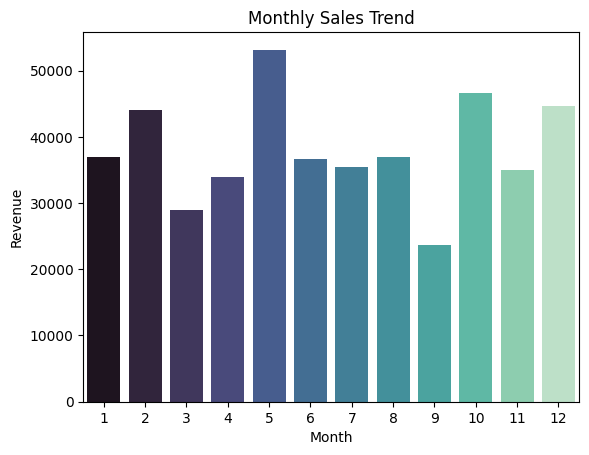

In [41]:
sns.barplot(monthly_sales,palette="mako")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")


C:\Users\Mayank saini\AppData\Local\Temp\ipykernel_12312\4078658752.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=gender_sales.index,x=gender_sales.values,palette="rainbow")


Text(0.5, 1.0, 'Gender-wise Spending')

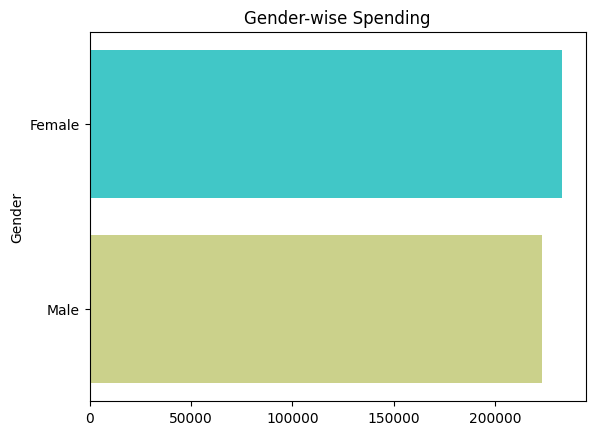

In [52]:
sns.barplot(y=gender_sales.index,x=gender_sales.values,palette="rainbow")
plt.title("Gender-wise Spending")

C:\Users\Mayank saini\AppData\Local\Temp\ipykernel_12312\2279045882.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_sales.index, y=age_sales.values,palette="husl")


Text(0.5, 1.0, 'Revenue by Age Group')

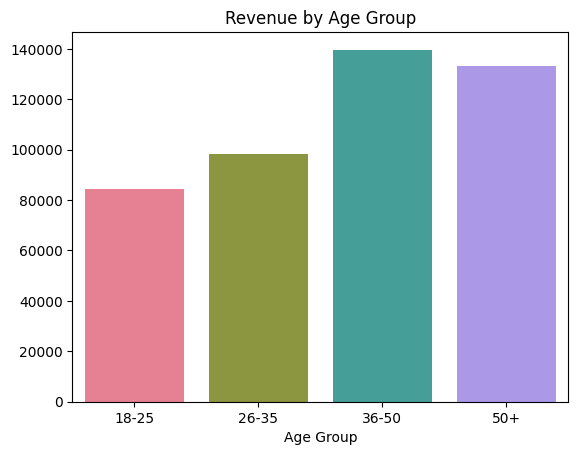

In [55]:
sns.barplot(x=age_sales.index, y=age_sales.values,palette="husl")
plt.title("Revenue by Age Group")

C:\Users\Mayank saini\AppData\Local\Temp\ipykernel_12312\1411307017.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(catagory_sale,palette="rainbow")


Text(0.5, 1.0, 'Category wise Sales')

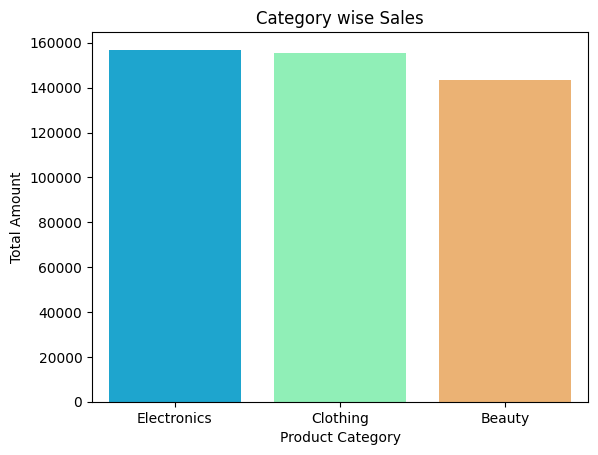

In [58]:
sns.barplot(catagory_sale,palette="rainbow")
plt.title("Category wise Sales")